# Кейс. Последовательное тестирование

## **Описание продукта**

**Кион** – это онлайн-кинотеатр, предоставляющий пользователям доступ к широкому спектру видеоконтента, включая фильмы, сериалы, телевизионные шоу, документальные фильмы, а также эксклюзивные премьеры. Основная цель Кион – предложить пользователям качественный развлекательный контент, который можно смотреть в любое время и на любом устройстве с доступом к интернету.

<img src="https://i.postimg.cc/8z8K5CXm/2024-07-31-01-06-53.png" width=800 height=600 />

## **Проблема**

Кион стремится рекомендовать пользователям наиболее интересный и релевантный контент, поэтому команда дата-сайентистов постоянно улучшает алгоритмы рекомендаций. Это особенно важно в условиях жесткой конкуренции на рынке стриминговых сервисов (Okko, Ivi, Кинопоиск и др.).

Любое ухудшение рекомендаций может привести к значительным потерям как в финансовых показателях, так и в других метриках активности платформы. Максимально критичным для нас является падение метрики TVTu (Total Viewing Time per User), потому что пониженная активность пользователей на платформе сигнализирует об оттоке в пользу конкурентов, что вызовет по инерции дальнейшее падение метрик. В связи с этим важно не допускать просадку в этой метрике.


Поэтому тестирование новых рекомендательных моделей должно быть максимально безопасным, но при этом не терять чувствительность эксперимента. Ведь маловероятно, что новая рекомендательная модель сразу покажет значительные улучшения. Нас будет интересовать эффект на целевой метрике TVTu в размере порядка 1\%.


Для безопасного тестирования необходима возможность ранней остановки эксперимента в случае неудачи (если новая модель рекомендаций оказывается неэффективной). При классическом подходе с фиксированной продолжительностью эксперимента это сделать сложно. Такой подход предполагает заранее определенные сроки эксперимента и подведение итогов только после его завершения. Если эксперимент окажется неудачным, мы узнаем об этом только в конце, что может привести к финансовым потерям, снижению репутации на рынке и другим проблемам.

---

Опишем вкратце текущую рекомендательную модель и ту, которая будет тестироваться.

1. В текущей версии мы используем историю просмотров, рейтинги с отзывами контента, а также степень похожесть.

2. В обновленной версии рекомендаций мы зашили учет некоторых сезонных факторов, учитывающих тенденеции в разное время года, выходные дни, праздники и некоторые другие аспекты. Гипотеза заключается в том, что это поможет повысить качество рекомендации, предлагая  контент релеватный не только для юзера, но для юзера в подходящий момент времени.


## **Описание решения**

Для обеспечения безопасности и эффективности тестирования новых рекомендательных алгоритмов на платформе Кион был выбран **метод последовательного тестирования (SPRT)**. Этот подход является критически важным, поскольку позволяет динамически принимать решения о продолжении или остановке эксперимента на основе текущих данных. В отличие от традиционного подхода с фиксированной продолжительностью (fixed-horizon), который требует завершения полного цикла эксперимента, последовательное тестирование предоставляет возможность гибко реагировать на результаты.

**Основное преимущество SPRT** заключается в его способности раннего выявления негативных эффектов. Если новый рекомендательный алгоритм демонстрирует значительное ухудшение показателей, эксперимент можно остановить задолго до его завершения. Это позволяет избежать затяжных финансовых потерь, которые могли бы возникнуть при использовании неэффективной модели на протяжении всего фиксированного периода тестирования.

Кроме того, метод последовательного тестирования сохраняет чувствительность эксперимента. Он обеспечивает высокую точность и надежность статистических выводов, что позволяет выявлять как положительные, так и отрицательные эффекты алгоритма на ранних этапах. Это особенно важно для минимизации риска и сохранения конкурентоспособности на рынке стриминговых сервисов, где малейшие изменения в качестве рекомендаций могут существенно повлиять на пользовательскую активность и удовлетворенность.

**Внедрение SPRT в онлайн-кинотеатре Кион позволяет**:

- Своевременно обнаруживать и устранять неэффективные модели рекомендаций.
- Сокращать финансовые и репутационные риски, связанные с длительным использованием неудачных алгоритмов.
- Улучшать процесс принятия решений на основе точных и своевременных данных.
- Повышать общую эффективность и качество пользовательского опыта за счет постоянного улучшения рекомендаций.

Таким образом, последовательное тестирование является стратегически важным инструментом для оптимизации и безопасного внедрения новых рекомендательных алгоритмов на платформе Кион.

## Данные

В качестве данных будем использовать ежедневные данные, содержащие активность на платформе онлайн-кинотетра Кион на протяжении месяца июня. 1-го июня 2024 мы запускаем тест и начинаем накапливать экспериментальные данные. В эксперименте будут принимать участие 10 000 пользователей, как в тестовой, так и в контрольной группе. Учтем внутринедельную сезонность, в рамках которой в выходные просмотров в среднем больше, чем в будни дни, что является логичным.

В качестве целевой метрики будет выступать TVTu (в разрезе дня, минутный). Другими словами - количество минут ежедневно, потраченное юзером на просмотр контента.

**TVTu (Total Viewing Time per User)** – это общее время, которое пользователь проводит за просмотром контента на платформе за определенный период.

Это одна из нескольких важных метрик, на которые стремятся влиять стриминговые сервисы (да, они заинтересованы в максимизации вовлеченности пользоваталей в платформу).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from scipy.stats import norm
from tqdm import tqdm

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1DXaEBeiEtuVlpAU8tYqBA2MbY1Zu4FG6')

In [ ]:
print(f'Размер таблицы: {len(data)} строк')

Размер таблицы: 620000 строк


In [ ]:
control_mean = data.loc[data['group'] == 'control', 'TVTu'].mean()
treat_mean = data.loc[data['group'] == 'treatment', 'TVTu'].mean()
delta_mean = treat_mean - control_mean
print(f'Средний дневной TVTu в эксперименте {treat_mean:.2f} минут')
print(f'Средний дневной TVTu в контроле: {control_mean:.2f} минут')
print(f'Разница среднего дневного TVTu: {delta_mean:.2f} минут')

Средний дневной TVTu в эксперименте 109.82 минут
Средний дневной TVTu в контроле: 112.74 минут
Разница среднего дневного TVTu: -2.92 минут


**В связи с тем, что данные по дням являются зависимыми, произведем агрегацию данных в разрезе юзера. Будем смотреть не конкретное значение TVTu внутри дня, а среднее значение подневного TVTu к конкретному дню.**

In [ ]:
# Добавим колонку с усредненной метрикой к конкретному дню
data['avg_TVTu_to_date'] = data.groupby('user_id')['TVTu'].expanding().mean().reset_index(level=0, drop=True)
data.head()

,user_id,date,group,TVTu,avg_TVTu_to_date
0,1,2024-06-01,control,165.342831,165.342831
1,10001,2024-06-01,treatment,0.000000,0.000000
2,2,2024-06-01,control,38.347140,38.347140
3,10002,2024-06-01,treatment,0.000000,0.000000
4,3,2024-06-01,control,195.537708,195.537708


**Мы заведомо сделали метрику в контроле больше для того, чтобы проверить возможности последовательного тестированию на раннюю детекцию ухудшающего эксперимента**

---
Оценим визуально распределение нашей метрики в каждой группе. Отличий мало, но на самом деле средние значение в группах достаточно различаются,  отметим высокую дисперсию показателя. Уберем при визуализации 0, так как есть много дней, когда юзеры не проявляли активность.

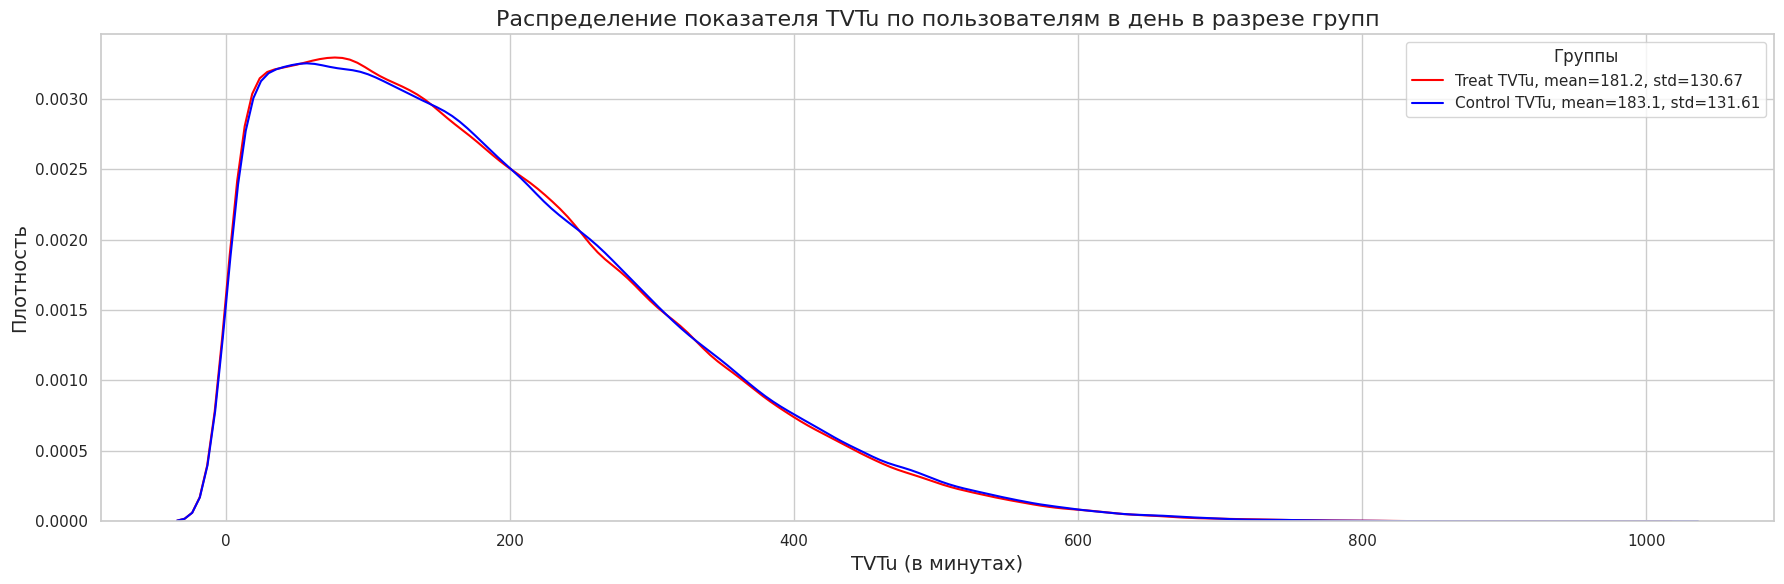

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 6))


treat_tvtu = data.loc[(data['TVTu'] > 0) & (data['group'] == 'treatment'), 'TVTu']
control_tvtu = data.loc[(data['TVTu'] > 0) & (data['group'] == 'control'), 'TVTu']

treat_mean, treat_std = treat_tvtu.mean(), treat_tvtu.std()
control_mean, control_std = control_tvtu.mean(), control_tvtu.std()

sns.kdeplot(
    treat_tvtu,
    color='red', label=f'Treat TVTu, mean={treat_mean:.1f}, std={treat_std:.2f}', fill=False
)
sns.kdeplot(
    control_tvtu,
    color='blue', label=f'Control TVTu, mean={control_mean:.1f}, std={control_std:.2f}', fill=False
)
plt.title('Распределение показателя TVTu по пользователям в день в разрезе групп', fontsize=16)
plt.xlabel('TVTu (в минутах)', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.legend(title='Группы')
plt.tight_layout()
plt.show()


## Классический дизайн

Покажем, сколько бы нам пришлось проводить по времени эксперимент, если бы мы следователи подходу fixed-horizon. Напомним формулу:


$$n = 2(\frac{Z_{\alpha/2} + Z_{\beta}}{\delta/\sigma})^2$$

Здесь:
* n — размер выборки для каждой группы
* $Z_{\alpha/2}$ — критическое значение стандартного нормального распределения для уровня значимости $\alpha$ (обычно 1.96 для $\alpha = 0.05$)
* $Z_{\beta}$ - критическое значение стандартного нормального распределения для мощности теста (обычно 0.84 для мощности 80%)
* $\delta$ - минимальный размер эффекта, который мы хотим обнаружить (1% от среднего TVTu).
* $\sigma$ - стандартное отклонение TVTu.


Рассчитаем на исходных данных длительность эксперимента.

In [ ]:
data.head()

,user_id,date,group,TVTu,avg_TVTu_to_date
0,1,2024-06-01,control,165.342831,165.342831
1,10001,2024-06-01,treatment,0.000000,0.000000
2,2,2024-06-01,control,38.347140,38.347140
3,10002,2024-06-01,treatment,0.000000,0.000000
4,3,2024-06-01,control,195.537708,195.537708


In [ ]:
def make_design(mean_value, std_value, eff=0.01):
  # Параметры для расчета размера выборки
  alpha = 0.05  # Уровень значимости
  beta = 0.2    # 1 - Мощность теста (мощность = 0.8)
  delta = eff * mean_value

  # Z-значения для заданного уровня значимости и мощности
  z_alpha = norm.ppf(1 - alpha / 2)
  z_beta = norm.ppf(1 - beta)

  # Расчет минимального размера выборки
  n = ((z_alpha + z_beta) * std_value / delta) ** 2 * 2
  return int(np.ceil(n))

**Посчитаем для каждого варианта длительности эксперимента (от 1 дня до 1 месяца), сколько нужно пользователей в каждую группу для отлова 1\% эффекта**


In [ ]:
metrics = data.groupby('date')['avg_TVTu_to_date'].agg(['std', 'mean']).reset_index()
metrics['n_samples'] = metrics.apply(lambda row: make_design(row['mean'], row['std']), axis=1)
metrics

,date,std,mean,n_samples
0,2024-06-01,138.463295,116.235166,222758
1,2024-06-02,98.120499,115.294031,113696
2,2024-06-03,79.209189,113.644398,76260
3,2024-06-04,68.478621,112.766609,57888
4,2024-06-05,60.938623,112.052938,46428
5,2024-06-06,55.492983,111.777134,38691
6,2024-06-07,51.258249,111.416503,33226
7,2024-06-08,47.845178,111.875746,28711
8,2024-06-09,45.236805,112.332618,25458
9,2024-06-10,42.947648,111.979629,23091


---
Таким образом, для детекции 1% эффекта на метрику TVTu (`avg_TVTu_to_date`) нам пришлось бы ждать порядка 23-24 дней, учитывая, что в каждой группе у нас будет порядка 10 000 уников. Но как уже говорили ранее fixed-horizon подход нас не устраивает в силу чрезмерного уровня риска.

## SPRT

<img src="https://evolytics.com/wp-content/uploads/2023/01/ST_graphic_tby-New-01.png" width=1000 height=300 />


**Sequential Probability Ratio Test (SPRT)** – это метод для последовательного тестирования, предложенный Абрахамом Вальдом в 1945 году. Метод позволяет проводить тестирование по мере накопления данных, а не на основе фиксированного объема выборки (как в fixed-horizon подходе). SPRT используется для принятия решения на более раннем этапе эксперимента, что особенно важно в условиях, когда необходимо принимать решения как можно быстрее.

**Основные элементы метода SPRT**:
1. Гипотезы:
   - Нулевая гипотеза $H_0$: Среднее значение метрики TVTu в контрольной группе равно среднему значению метрики TVTu в экспериментальной группе.
   - Альтернативная гипотеза $H_1$: Среднее значение метрики TVTu в контрольной группе отличается от среднего значения метрики TVTu в экспериментальной группе (отличие фиксированного размера)
2. Пороги:
   - Порог для принятия $H_0$: $A = \log{\frac{\beta}{1-\alpha}}$
   - Порог для принятия $H_1$: $B = \log{\frac{1 - \beta}{\alpha}}$
   Где $\alpha$, $\beta$ - допустимые вероятности ошибок 1-2 рода.
3. Расчёт отношения правдоподобия:
   - В каждый момент времени рассчитывается накопленное логарифмическое отношение правдоподобия (LLR):
     
$$LLR = \sum_{i=1}^{n} \log{\frac{P(X_i|H_1)}{P(X_i|H_0)}}$$

4. Правило остановки:
   - Если $LLR \le A$, принимается $H_0$ и эксперимент останавливается
   - Если $LLR \ge B$, принимается $H_1$ и эксперимент останавливается
   - Есил $A < LLR < B$, продолжаем эксперимент
   

## Решение

Тест новой рекомендательной модели стартует 1-го июня, давайте применим классический метод SPRT и будем отслеживать результаты в динамике.

In [ ]:
from scipy.stats import norm

def sprt(data, goal_metric='avg_TVTu_to_date', alpha=0.05, beta=0.2, delta=5):
    log_alpha = np.log(beta / (1 - alpha))
    log_beta = np.log((1 - beta) / alpha)
    daily_data = data.groupby(['date', 'group'])[goal_metric].mean().unstack()

    log_likelihood_ratio = 0
    log_likelihood_ratios = []
    decision = None
    for i in range(len(daily_data)):
        mean_control = daily_data['control'].iloc[i]
        mean_treatment = daily_data['treatment'].iloc[i]

        control_data = data.loc[(data['date'] == daily_data.index[i]) & (data['group'] == 'control')]
        treatment_data = data.loc[(data['date'] == daily_data.index[i]) & (data['group'] == 'treatment')]
        n_a, var_a = len(control_data), control_data[goal_metric].var()
        n_b, var_b = len(treatment_data), treatment_data[goal_metric].var()
        se = (var_a / n_a + var_b / n_b) ** 0.5

        h1 = (mean_treatment - mean_control - delta) / se
        h0 = (mean_treatment - mean_control) / se

        log_likelihood_ratio += np.log(norm.pdf(h1) / norm.pdf(h0))
        log_likelihood_ratios.append(log_likelihood_ratio)

        if log_likelihood_ratio <= log_alpha:
            decision = 'stop and accept H0'
            break
        elif log_likelihood_ratio >= log_beta:
            decision = 'stop and accept H1'
            break
    return decision, log_likelihood_ratios


def visualize_sprt(log_likelihood_ratios, alpha=0.05, beta=0.2):
    log_alpha = np.log(beta / (1 - alpha))
    log_beta = np.log((1 - beta) / alpha)

    plt.figure(figsize=(12, 6))
    plt.plot(log_likelihood_ratios, label='Log-Likelihood Ratio', marker='o', color='blue')
    plt.axhline(y=log_alpha, color='r', linestyle='--', label='Log Alpha Threshold')
    plt.axhline(y=log_beta, color='g', linestyle='--', label='Log Beta Threshold')
    plt.xlabel('Day Number')
    plt.ylabel('Log-Likelihood Ratio')
    plt.legend()
    plt.title('Sequential Probability Ratio Test')
    plt.show()




Визуализируем динамику LLR. Остановка эксперимент будет выполнена в момент пробития порога. Будем использовать наше знание об истинном эффекте, но в реальности необходимо тестированить различные эффекты и отслеживать значение LLR.

SPRT Decision: stop and accept H1


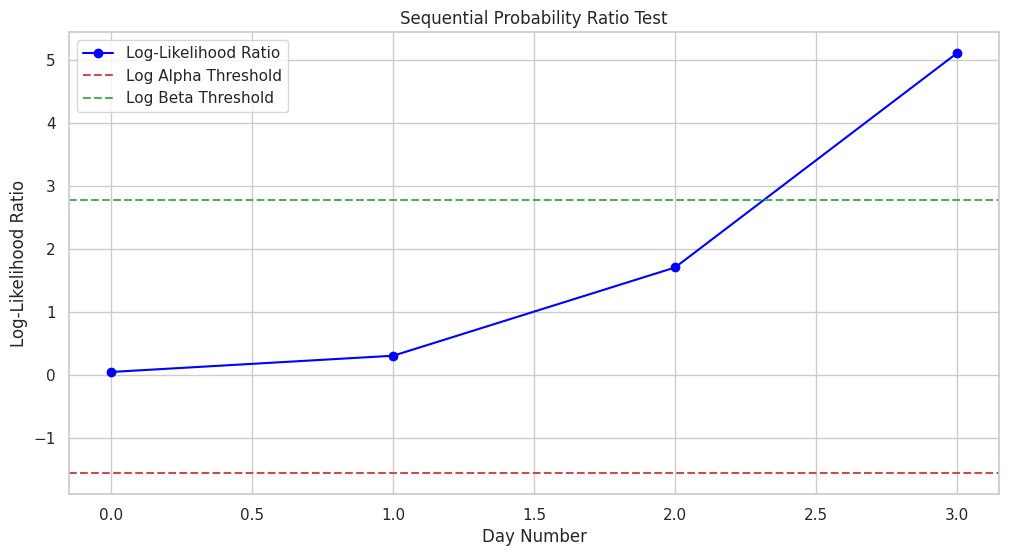

In [ ]:
# Учтем нашу истинную разницу средних
decision_sprt, log_likelihood_ratios_sprt = sprt(data, delta=-2.92)
print(f"SPRT Decision: {decision_sprt}")

# Визуализация результатов
visualize_sprt(log_likelihood_ratios_sprt)

---
Нам удалось поймать отрицательный эффект (реальный) на 3-й день эксперимента и не допустить дальнейших потерь. Если бы мы придерживались fixed horizon подхода, то пришлось бы чуть больше 3 недель держать заведомо слабый эксперимент.

Также проиллюстрируем, что SPRT не даёт детектировать положительный эффект и предлагает останавливать эксперимент с "принятием" $H_0$.

SPRT Decision: stop and accept H0


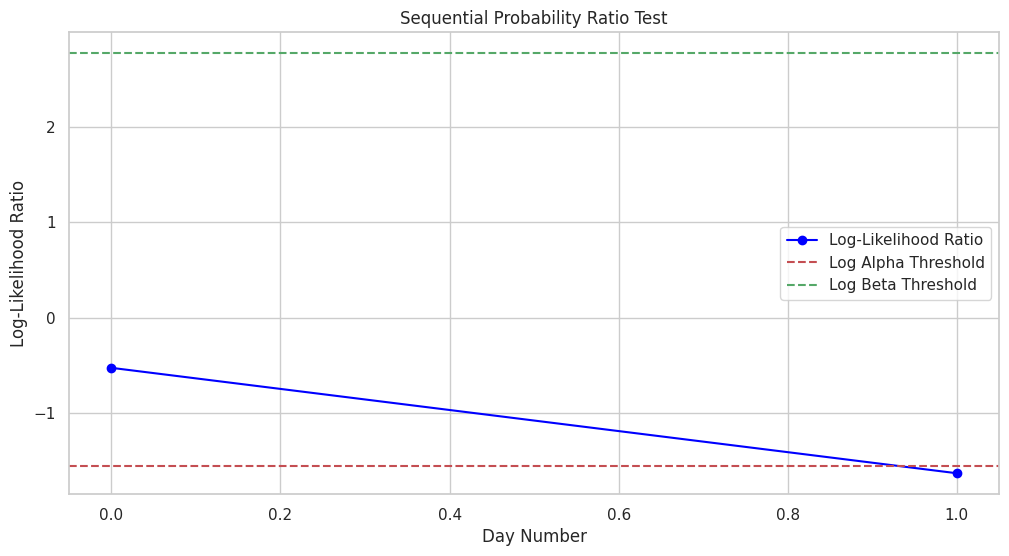

In [ ]:
# delta = 1
decision_sprt, log_likelihood_ratios_sprt = sprt(data, delta=1)
print(f"SPRT Decision: {decision_sprt}")

visualize_sprt(log_likelihood_ratios_sprt)

SPRT Decision: stop and accept H0


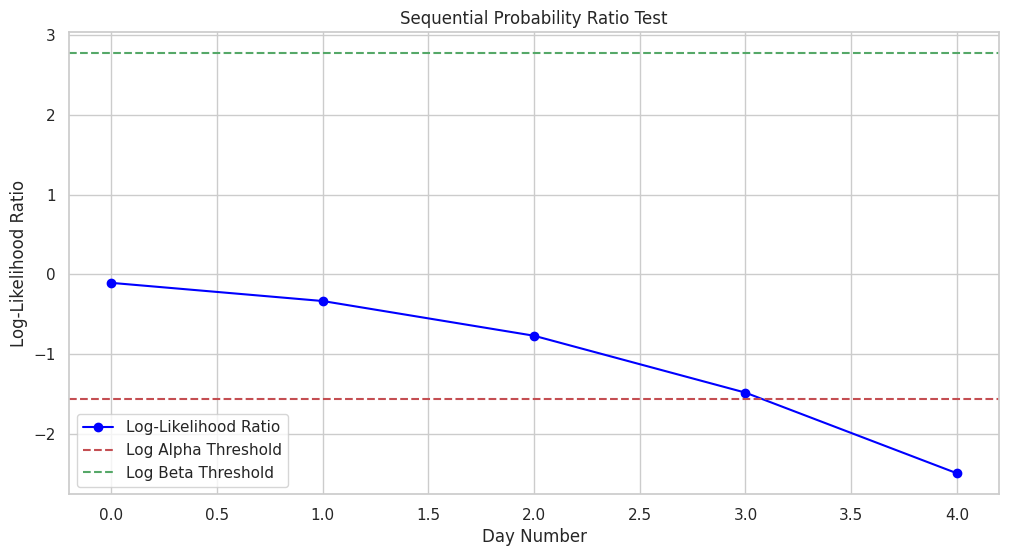

In [ ]:
# delta = 0.25
decision_sprt, log_likelihood_ratios_sprt = sprt(data, delta=0.25)
print(f"SPRT Decision: {decision_sprt}")

visualize_sprt(log_likelihood_ratios_sprt)

---
Мы достигли нашей задачи и сумели при помощи SPRT (последовательного тестирования) **не допустить серьезных потерь**, что не удалось был при использовании классического fixed-horizon подхода. После остановки эксперимента команда нашла закравшуюся проблему в новой моделе, отрефакторила её и снова запустила эксперимент, который оказался успешнее.